**Задание**

**Цель:** изучить применение модели логистической регрессии и метода опорных векторов в задаче бинарной классификации.

**Описание задания:**

В домашнем задании нужно решить задачу классификации физических лиц по уровню дохода. Данные для обучения модели хранятся в файле adult.csv, который можно найти в материалах к занятию или скачать с сайта.

Целевая переменная – уровень дохода income, который принимает два значения <=50K и >50K, поэтому классификация бинарная. Остальные признаки описывают персональную информацию – возраст, образование, семейное положение и т. д. Подробное описание признаков и их возможные значения можно получить самостоятельно, используя функции Python3 для анализа датасета (describe, unique и т.д) или прочитать информацию по ссылке.

Задачу классификации нужно решить при помощи обучения модели логистической регрессии и модели опорных векторов.

**Этапы работы:**

Получите данные и загрузите их в рабочую среду. (Jupyter Notebook или другую)

Проведите первичный анализ.

Проверьте данные на пропуски. Удалите в случае обнаружения. *Предложите альтернативный способ работы с пропусками

Постройте 1-2 графика на выбор. Визуализация должна быть основана на исследуемых данных и быть полезной (из графика можно сделать вывод об особенностях датасета/класса/признака)

Преобразуйте категориальные признаки.

Разделите выборку на обучающее и тестовое подмножество. 80% данных оставить на обучающее множество, 20% на тестовое.

Обучите модели логистической регрессии и опорных векторов на обучающем множестве.

Для тестового множества предскажите уровень дохода и сравните с истинным значением, посчитав точность предсказания моделей. Для этого используйте встроенную функцию score.

Сформулируйте выводы по проделанной работе.

Кратко опишите какие преобразования были сделаны с данными.

Сравните точность двух моделей.

Напишите свое мнение, в полной ли мере модели справились с поставленной задачей.

*Что по вашему мнению нужно сделать, чтобы улучшить результат ?
Для получение зачета по этому домашнему заданию, минимально, должно быть реализовано обучение двух моделей классификации, выведена их точность.

**Результат:**

получены базовые знания по подготовке данных к работе с моделями машинного обучения. Построено 2 модели классификации, сделан вывод о целесообразности их применения к данным.

**Форма выполнения:** ссылка на Jupyter Notebook, загруженный на GitHub; ссылка на Google Colab; файл с расширением .ipynb.

**Инструменты:** Jupyter Notebook/Google Colab; GitHub.

**Срок выполнения:** 7 календарных дней

**Рекомендации к выполнению:**

Текст оформляйте в отдельной ячейке Jupyter Notebook/Google Colab в формате markdown.
У графиков должен быть заголовок, подписи осей, легенда (опционально). Делайте графики бОльшего размера, чем стандартный вывод, чтобы увеличить читаемость.
Убедитесь, что по ссылкам есть доступ на чтение/просмотр.
Убедитесь, что все ячейки в работе выполнены и можно увидеть их вывод без повторного запуска.

In [ ]:
import numpy as np
import pandas as pd
import scipy.stats

**Этап 1. Получение, первичное изучение, обработка данных**

In [ ]:
#Получаем данные и загружаем их в рабочую среду
data_adult = pd.read_csv('/content/adult.csv')
data_adult.head(20)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


In [ ]:
#Проведем первичный анализ.
data_adult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [ ]:
data_adult.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [ ]:
#Удаляем строки с пустыми значениями
data_adult = data_adult.dropna()
data_adult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [ ]:
#Удалим столбцы, значения в которых не будем использовать для анализа
data_adult.drop(['educational-num', 'occupation', 'capital-gain', 'capital-loss'], axis=1, inplace=True)
data_adult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       48842 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   marital-status  48842 non-null  object
 5   relationship    48842 non-null  object
 6   race            48842 non-null  object
 7   gender          48842 non-null  object
 8   hours-per-week  48842 non-null  int64 
 9   native-country  48842 non-null  object
 10  income          48842 non-null  object
dtypes: int64(3), object(8)
memory usage: 4.1+ MB


Некоторые колонки (например,workclass) содержат пропуски (символ "?").
Посмотрим, сколько строк с такими значениями, а также есть ли еще такие столбцы в таблице.

In [ ]:
#проверим количество значений в колонках, содержащих символ "?"
for column in data_adult.columns.values.tolist():
    print(f'{column}:{len(data_adult[data_adult[column]=="?"])}')

age:0
workclass:2799
fnlwgt:0
education:0
marital-status:0
relationship:0
race:0
gender:0
hours-per-week:0
native-country:857
income:0


Как видно из первичного анализа, колонки workclass, native-country содержат пустые значения в виде символа "?". Их немного в сравнении с количеством записей в таблице. Кроме того, данные категориальные, в связи с чем на данном этапе их корректное заполнение затруднительно. Удалим строки.

Один из вариантов, заполнить пропуски средним по какой-нибудь группе.

In [ ]:
#удалаяем пустые строки
cols = ['workclass', 'native-country']
for column in data_adult.columns.values.tolist():
    if column in cols:
        data_adult = data_adult.loc[data_adult[column] != '?']

In [ ]:
#проверяем удалились ли строки
data_adult.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45232 entries, 0 to 48841
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             45232 non-null  int64 
 1   workclass       45232 non-null  object
 2   fnlwgt          45232 non-null  int64 
 3   education       45232 non-null  object
 4   marital-status  45232 non-null  object
 5   relationship    45232 non-null  object
 6   race            45232 non-null  object
 7   gender          45232 non-null  object
 8   hours-per-week  45232 non-null  int64 
 9   native-country  45232 non-null  object
 10  income          45232 non-null  object
dtypes: int64(3), object(8)
memory usage: 4.1+ MB


In [ ]:
#удаляем дубликаты
data_adult = data_adult.drop_duplicates()
data_adult.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45082 entries, 0 to 48841
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             45082 non-null  int64 
 1   workclass       45082 non-null  object
 2   fnlwgt          45082 non-null  int64 
 3   education       45082 non-null  object
 4   marital-status  45082 non-null  object
 5   relationship    45082 non-null  object
 6   race            45082 non-null  object
 7   gender          45082 non-null  object
 8   hours-per-week  45082 non-null  int64 
 9   native-country  45082 non-null  object
 10  income          45082 non-null  object
dtypes: int64(3), object(8)
memory usage: 4.1+ MB


In [ ]:
#Построим график 1
graph1 = data_adult.groupby(['workclass', 'income']).size().reset_index(name='counts')
graph1['workclass_income'] = graph1['workclass']+' '+graph1['income']
graph1.head()

,workclass,income,counts,workclass_income
0,Federal-gov,<=50K,857,Federal-gov <=50K
1,Federal-gov,>50K,548,Federal-gov >50K
2,Local-gov,<=50K,2185,Local-gov <=50K
3,Local-gov,>50K,915,Local-gov >50K
4,Never-worked,<=50K,10,Never-worked <=50K


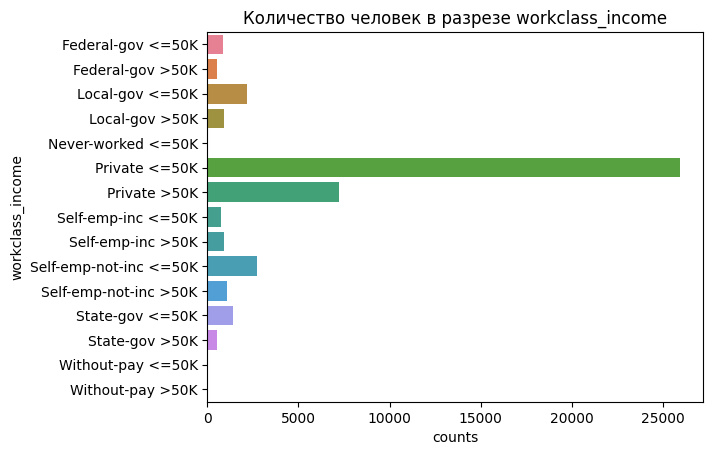

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x='counts', y='workclass_income', hue = 'workclass_income', data=graph1);
plt.title('Количество человек в разрезе workclass_income');

Как видно из графика, самый многочисленный рабочий класс 'Private'. Более того, в нем больше всего людей с доходом <=50K.

In [ ]:
#Построим график 2
graph2 = data_adult.groupby(['education', 'income']).size().reset_index(name='counts')
graph2['education_income'] = graph2['education']+' '+graph2['income']
graph2.head()

,education,income,counts,education_income
0,10th,<=50K,1142,10th <=50K
1,10th,>50K,82,10th >50K
2,11th,<=50K,1530,11th <=50K
3,11th,>50K,89,11th >50K
4,12th,<=50K,531,12th <=50K


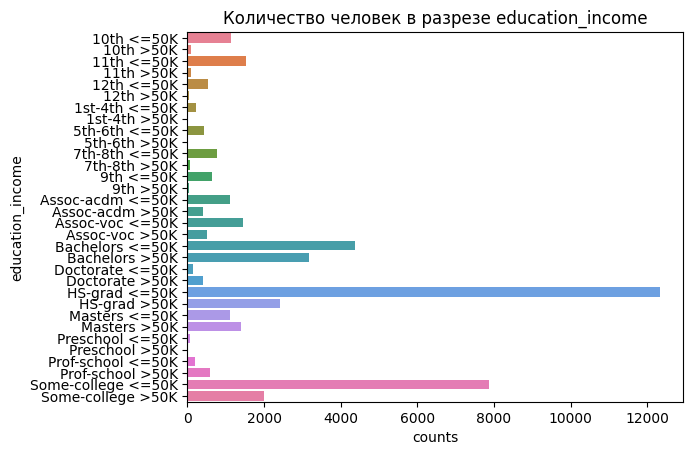

In [ ]:
sns.barplot(x='counts', y='education_income', hue = 'education_income', data=graph2);
plt.title('Количество человек в разрезе education_income');

Как видно из графика, больше всего людей в выборке принадлежат к одному из трех категорий по уровню образования - HS-grad, Some-College, Bachelors.

При этом можно предположить, что чем выше уровень образования, тем соотношение количества людей с доходом <=50K и >50K внутри группы выравнивается. Также можно предположить, что люди с ученой степенью с большей вероятностью попадают в группу с более высоким доходом.

**Этап 2. Подготовка данных для модели**

In [ ]:
# целевая переменная (столбец income) является категориальной
# переведем значения столбца в числа, оставив один столбец

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
data_adult.loc[:, 'income_category'] = le.fit_transform(data_adult.loc[:, 'income'])

In [ ]:
data_adult

,age,workclass,fnlwgt,education,marital-status,relationship,race,gender,hours-per-week,native-country,income,income_category
0,25,Private,226802,11th,Never-married,Own-child,Black,Male,40,United-States,<=50K,0
1,38,Private,89814,HS-grad,Married-civ-spouse,Husband,White,Male,50,United-States,<=50K,0
2,28,Local-gov,336951,Assoc-acdm,Married-civ-spouse,Husband,White,Male,40,United-States,>50K,1
3,44,Private,160323,Some-college,Married-civ-spouse,Husband,Black,Male,40,United-States,>50K,1
5,34,Private,198693,10th,Never-married,Not-in-family,White,Male,30,United-States,<=50K,0
...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,Married-civ-spouse,Wife,White,Female,38,United-States,<=50K,0
48838,40,Private,154374,HS-grad,Married-civ-spouse,Husband,White,Male,40,United-States,>50K,1
48839,58,Private,151910,HS-grad,Widowed,Unmarried,White,Female,40,United-States,<=50K,0
48840,22,Private,201490,HS-grad,Never-married,Own-child,White,Male,20,United-States,<=50K,0


In [ ]:
#Создадим датасет с теми признаками, на основании которых будем делать предсказание
data_adult_set1 = data_adult[['workclass', 'education', 'hours-per-week']].reset_index(drop=True)
data_adult_set1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45082 entries, 0 to 45081
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   workclass       45082 non-null  object
 1   education       45082 non-null  object
 2   hours-per-week  45082 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.0+ MB


In [ ]:
#закодируем категориальные переменные (workclass,education)
from sklearn.preprocessing import OneHotEncoder

In [ ]:
encoder = OneHotEncoder(handle_unknown='ignore')

In [ ]:
dencoder_df_workclass = pd.DataFrame(encoder.fit_transform(data_adult_set1[['workclass']]).toarray())
dencoder_df_workclass

,0,1,2,3,4,5,6,7
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
45077,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
45078,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
45079,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
45080,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
#Выведем новые признаки с помощью метода .get_feature_names_out().
encoder.get_feature_names_out()

array(['workclass_Federal-gov', 'workclass_Local-gov',
       'workclass_Never-worked', 'workclass_Private',
       'workclass_Self-emp-inc', 'workclass_Self-emp-not-inc',
       'workclass_State-gov', 'workclass_Without-pay'], dtype=object)

In [ ]:
#Используем вывод этого метода, чтобы добавить названия столбцов.
dencoder_df_workclass.columns = encoder.get_feature_names_out()
dencoder_df_workclass.head()

,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
#Присоединим новые признаки к исходному датафрейму,удалив признак workclass.

data_adult_set1 = data_adult_set1.join(dencoder_df_workclass)
data_adult_set1.drop('workclass', axis = 1, inplace = True)

In [ ]:
data_adult_set1.head()

,education,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay
0,11th,40,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,HS-grad,50,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,Assoc-acdm,40,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Some-college,40,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,10th,30,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
#повторим действия для education
dencoder_df_education = pd.DataFrame(encoder.fit_transform(data_adult_set1[['education']]).toarray())
dencoder_df_education.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
encoder.get_feature_names_out()

array(['education_10th', 'education_11th', 'education_12th',
       'education_1st-4th', 'education_5th-6th', 'education_7th-8th',
       'education_9th', 'education_Assoc-acdm', 'education_Assoc-voc',
       'education_Bachelors', 'education_Doctorate', 'education_HS-grad',
       'education_Masters', 'education_Preschool',
       'education_Prof-school', 'education_Some-college'], dtype=object)

In [ ]:
dencoder_df_education.columns = encoder.get_feature_names_out()
dencoder_df_education

,education_10th,education_11th,education_12th,education_1st-4th,education_5th-6th,education_7th-8th,education_9th,education_Assoc-acdm,education_Assoc-voc,education_Bachelors,education_Doctorate,education_HS-grad,education_Masters,education_Preschool,education_Prof-school,education_Some-college
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45077,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
45078,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
45079,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
45080,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
data_adult_set1 = data_adult_set1.join(dencoder_df_education)
data_adult_set1.drop('education', axis = 1, inplace = True)

In [ ]:
data_adult_set1

,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_10th,...,education_9th,education_Assoc-acdm,education_Assoc-voc,education_Bachelors,education_Doctorate,education_HS-grad,education_Masters,education_Preschool,education_Prof-school,education_Some-college
0,40,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,50,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,40,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,40,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,30,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45077,38,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
45078,40,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
45079,40,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
45080,20,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


**Этап 3. Обучение моделей**

In [ ]:
#Разделим выборку на обучающее и тестовое подмножество.
from sklearn.model_selection import train_test_split

In [ ]:
X = data_adult_set1 #признаки
y = data_adult['income_category'] #Целевая переменная

In [ ]:
print(X.shape)
print(y.shape)

(45082, 25)
(45082,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(36065, 25)
(36065,)
(9017, 25)
(9017,)


In [ ]:
#Обучим модели логистической регрессии и опорных векторов на обучающем множестве.
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

model1 = make_pipeline(
                      StandardScaler(),
                      LogisticRegression(max_iter=1000)
                      )

model2 = make_pipeline(
                      StandardScaler(),
                      SVC()
                      )

In [ ]:
model1.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(max_iter=1000))])

In [ ]:
model2.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()), ('svc', SVC())])

In [ ]:
#Для тестового множества предскажем уровень дохода и сравним с истинным значением
predictions1 = model1.predict(X_test)
predictions2 = model2.predict(X_test)
print(predictions1)
print(predictions2)

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


In [44]:
print(f'Точность модели 1 (логистическая регрессия/обучающая выборка): {model1.score(X_train, y_train)}')
print(f'Точность модели 1 (логистическая регрессия/тестовая выборка): {model1.score(X_test, y_test)}')
print(f'Точность модели 2 (SVM/обучающая выборка): {model2.score(X_train, y_train)}')
print(f'Точность модели 2 (SVM/тестовая выборка): {model2.score(X_test, y_test)}')

Точность модели 1 (логистическая регрессия/обучающая выборка): 0.7798696797449051
Точность модели 1 (логистическая регрессия/тестовая выборка): 0.7686591992902295
Точность модели 2 (SVM/обучающая выборка): 0.7824760848468044
Точность модели 2 (SVM/тестовая выборка): 0.7719862481978486


**ВЫВОДЫ:**

В данной работе было сделано следующее:
1. Проведена предобработка данных:
- оценены базовые статистики,
- удалены строки с пропусками, нерелевантные столбцы, дубликаты,
- сделана визуализация части данных.
2. Проведена подготовка данных для построения модели:
- выбраны конкретные признаки для построения модели,
- выбрана целевая переменная;
- проведена кодировка категориальных признаков,
- проведено разделение данных для обучающего и тестового подмножеств.
3. Построены 2 модели с применением логистической регрессия и метода SVM.

  Точность двух моделей немного различается.

  Точность модели с применением логистической регрессией (на тестовой выборке) составила 0,7687.

  Точность модели с применением метода SVM (на тестовой выборке) составила 0,772.

  Указанное означает, что модели в 76-77 % случаев предсказывают верный результат (относят человека к той или иной категрии по уровню дохода).

Вместе с тем точность моделей можно попробовать улучшить:
- добавив признаки, не используемые в текущем эксперименте (например, возраст, пол, семейное положение);
- заполнив пропуски и сохранив тем самым часть значений;
- изменить соотношение обучающего и тестового подномножеств.